In [1]:
import pandas as pd
df = pd.read_csv('heart disease classification dataset.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

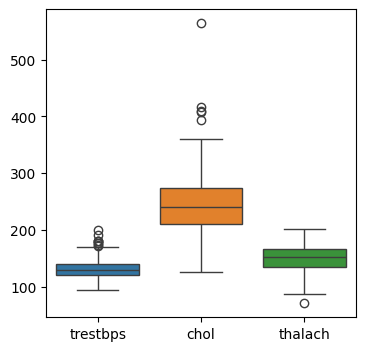

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,4))
sns.boxplot(data=df[['trestbps','chol','thalach']])
plt.show()

In [5]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].median())
df['chol'] = df['chol'].fillna(df['chol'].median())
df['thalach'] = df['thalach'].fillna(df['thalach'].median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df = pd.get_dummies(df, columns = ['sex'], drop_first=True)
df

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_male
0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes,True
1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes,True
2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes,False
3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes,True
4,57,0,130.0,354.0,0,1,163.0,1,0.6,2,0,2,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no,False
299,45,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no,True
300,68,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no,True
301,57,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3,no,True


In [7]:
df['target'].value_counts()

target
yes    165
no     138
Name: count, dtype: int64

In [8]:
df['target'] = df['target'].map({'yes':1,'no':0})
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_male
0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,True
1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,True
2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1,False
3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1,True
4,57,0,130.0,354.0,0,1,163.0,1,0.6,2,0,2,1,False


In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Accuracy : ", accuracy)
print("Precision : ",precision)
print("Recall",recall)
print("F1 Score",f1)

Accuracy :  0.8688524590163934
Precision :  0.9
Recall 0.84375
F1 Score 0.8709677419354839


In [11]:
import pickle
pickle.dump(model, open('model.pkl','wb'))